In [ ]:
import os
import tarfile
import urllib

# Base URL hosting the dataset (from Hands-On ML repo)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# Local directory to store the dataset
HOUSING_PATH = os.path.join("datasets", "housing")
# Full URL to the compressed dataset archive
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """
    Download and extract the California Housing dataset.

    Args:
        housing_url: Source URL of the compressed dataset.
        housing_path: Local path where the dataset will be stored.

    Side effects:
        - Creates the target directory if missing.
        - Downloads housing.tgz into the directory.
        - Extracts housing.csv into the same directory.
    """
    # Ensure target directory exists
    os.makedirs(housing_path, exist_ok=True)
    # Download the compressed archive
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    # Extract archive to target directory
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    """
    Load the housing.csv into a pandas DataFrame.

    Args:
        housing_path: Directory containing housing.csv.

    Returns:
        pandas.DataFrame: The housing dataset with 20,640 rows and 10 columns.
    """
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



In [ ]:
# Download the dataset (if not already present) and load into a DataFrame
fetch_housing_data()
# Read the CSV into a DataFrame
housing = load_housing_data()
# Preview the first few rows to verify loading worked
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [169]:
#Getting quick description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Observations:
1. total_bedroom contains null values, whcih need to be handled.
2. The ocean_proximity column is of type object, that is something to be dealt with.


In [170]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [171]:
#This method gives a summary of the numerical attributes of the dataset.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


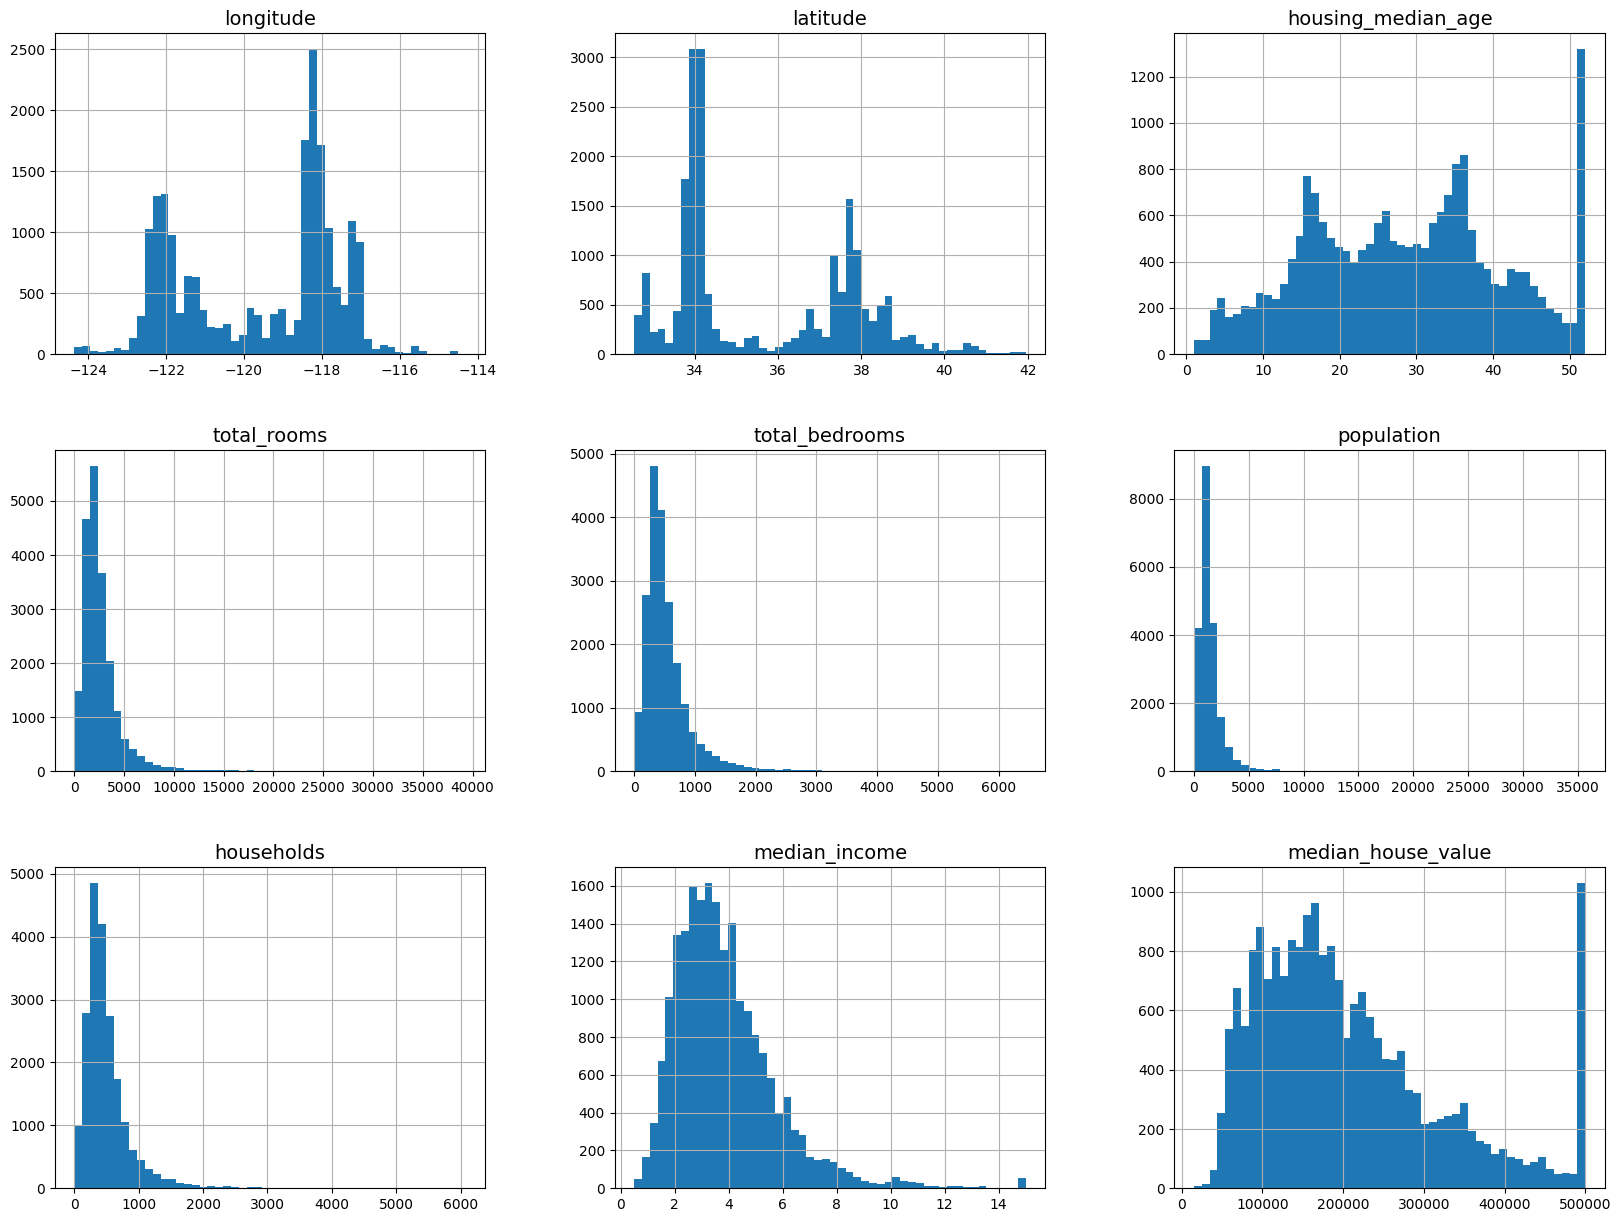

In [172]:
#Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute.
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Create Test Set

In [ ]:
# Under-the-hood implementation of sklearn's train_test_split()
import numpy as np

def split_train_test(data, test_ratio):
    """
    Split a DataFrame into train and test sets using random permutation.

    Args:
        data (pd.DataFrame): Full dataset to split.
        test_ratio (float): Fraction of rows to include in the test set.

    Returns:
        (train_df, test_df): Tuple of DataFrames for training and testing.
    """
    # Generate a random permutation of row indices
    shuffled_indices = np.random.permutation(len(data))
    # Compute number of rows to allocate to test set
    test_set_size = int(len(data) * test_ratio)
    # Slice indices for test and train splits
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    # Return the corresponding DataFrame rows
    return data.iloc[train_indices], data.iloc[test_indices]

In [174]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [175]:
# MAIN-Splitting the dataset using sklearn's predefined function

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: >

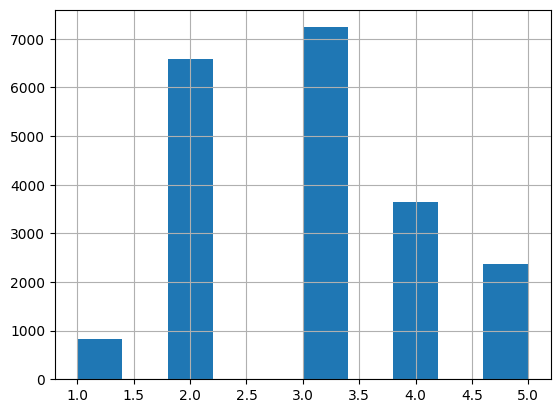

In [ ]:
# Create an income category to enable stratified sampling
# This helps maintain similar income distributions in train & test sets
housing['income_cat'] = pd.cut(
    housing['median_income'],
    bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)
# Visualize the distribution of income categories
housing['income_cat'].hist()

In [177]:
#Now that we have split the median income into different categories, we can apply stratified sampling to it
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [178]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [179]:
#Now that we have learned how stratified sampling works, lets drop the feature of income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [ ]:
# Work with a copy of the training set only to avoid data leakage
# (Optionally, you can create a smaller exploration subset for faster EDA)
housing = strat_train_set.copy()


<Axes: xlabel='longitude', ylabel='latitude'>

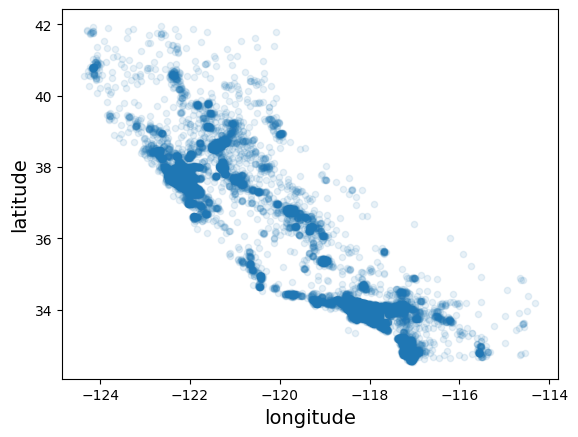

In [181]:
# As we have latitudes and longitudes, lets plot them to see if we observe anything particular
housing.plot(kind='scatter', x='longitude', y='latitude',alpha = 0.1) # Alpha is the transparncy parameter

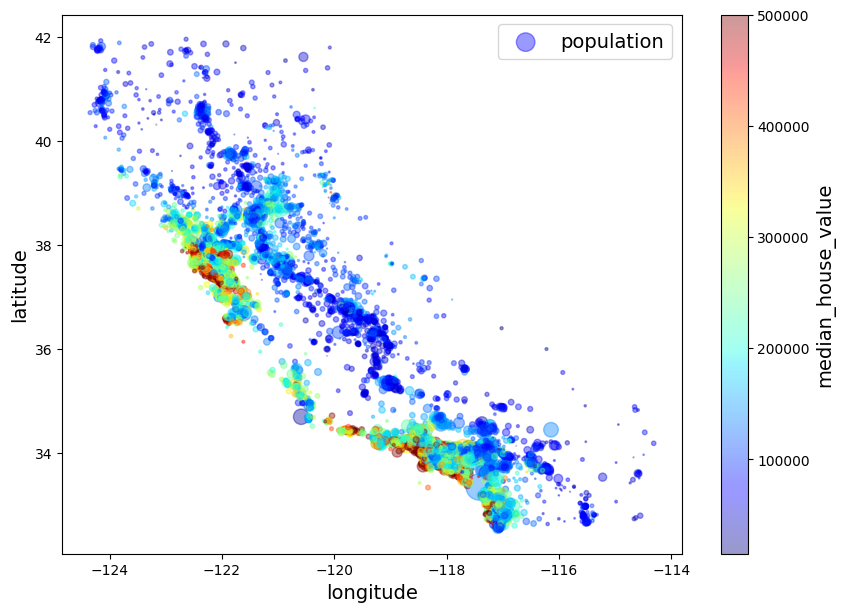

In [182]:
# Now lets take a look at the housing prices based on location
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

From mid to south we observe that the prices are affected by proximity to the ocean. But this is not the same case for the regions on the north coast.

In [183]:
# Now , calculating the correlation to identify how each of the features is affected by other features.
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

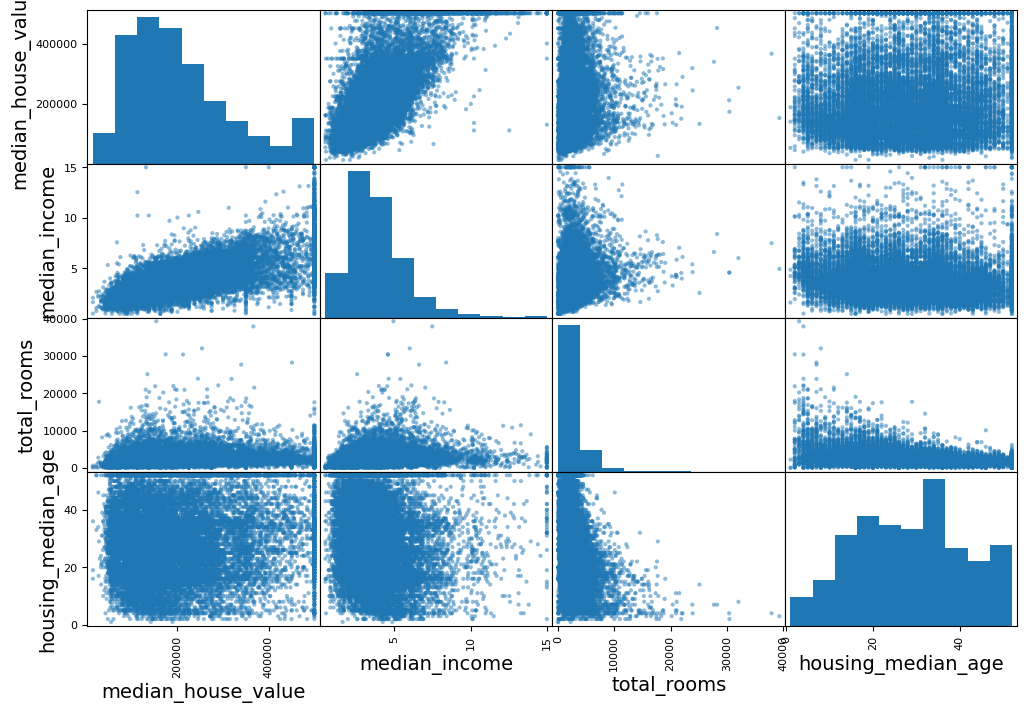

In [184]:
# Alternate way to check for correlation between attributes is to use the pandas scatter_matrix()
# This plots every numerical attribute against every other attribute
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

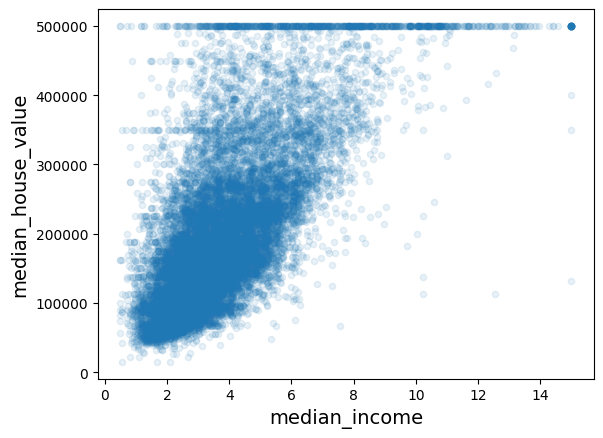

In [185]:
# Since median income has the highest correlation with the target , we'll explore it a bit more, lets lot it now
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)


In [ ]:
# Feature engineering: create informative ratios
# These often capture relationships better than raw features
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [187]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


## Visualization is done, preparing the data for ML algorithms
### Best practices at this step:
1. Instead of doing this manually, you should write functions for this purpose.

2. This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).

3. You will gradually build a library of transformation functions that you can reuse in future projects.

4. You can use these functions in your live system to transform the new data before feeding it to your algorithms.

5. This will make it possible for you to easily try various transformations and see which combination of transformations works best.

In [188]:
# Doing this beacuse we dont want to apply the same transformation to both the predictors and labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# Handle missing values (e.g., in total_bedrooms) with median imputation
from sklearn.impute import SimpleImputer
# Create an imputer configured to fill missing values with the median of each column
imputer = SimpleImputer(strategy="median")

# Apply imputation only to numerical columns (drop categorical)
housing_num = housing.drop("ocean_proximity", axis=1)
# Learn medians from the training data
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [ ]:
# Transform the data and reconstruct a DataFrame with original column names/index
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### Handling Text and Categorical Values

In [191]:
# Ocean_Proximity feature has textual attributes, while the others are numerical, handling them is very imp before feeding it to the ML algorithm
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [192]:
# Let's try some encoding tehnique on this
# 1. Ordinal Encoding (Note: The data we are dealing with in ocean proximity is nominal data, i.e it does not have any order in it, so it is better to use some other technique)
# Ordinal Encoding may introduce some unintentional ordering in the data
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [193]:
# Using one hot encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

### Feature Scaling

In [ ]:
# Standardize numerical features: mean=0, std=1 (helps many ML models)
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [195]:
# Using the minmax scaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_minmax_scaled = minmax_scaler.fit_transform(housing_num)

### Exploring sklearn's pipelines
# Pipelines chain preprocessing steps and make experimentation & deployment easier

In [ ]:
# Named steps in the pipeline for clarity; alternatively use make_pipeline()
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [197]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [198]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [199]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns= num_pipeline.get_feature_names_out(), index=housing_num.index)

In [200]:
df_housing_num_prepared.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Explicit lists of numerical and categorical features
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# Categorical pipeline: impute missing values then one-hot encode
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# Combine numerical and categorical pipelines into a single transformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [202]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
# Fit the preprocessing pipeline and transform the training data
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    """
    Custom transformer that encodes each sample by its similarity to KMeans cluster centers.

    This is useful for capturing non-linear geographic patterns (e.g., location clusters)
    by measuring RBF-kernel similarity to learned centroids.

    Parameters:
        n_clusters (int): Number of KMeans clusters.
        gamma (float): RBF kernel width (higher -> sharper similarity).
        random_state (int|None): Seed for reproducibility.
    """
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        """
        Fit KMeans on the input features X.
        """
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        """
        Return RBF-kernel similarities to the learned cluster centers.
        Shape: [n_samples, n_clusters]
        """
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans

# Helper to compute column-wise ratios when provided a 2D array of two columns
# e.g., bedrooms/rooms, rooms/households, population/households

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

# Provide a stable name for the generated ratio feature in the pipeline

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # single new feature name

# Small pipeline to impute, compute ratio and scale

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

# Log-transform skewed features, then scale
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

# Geographic similarity features from clustering
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

# Default numeric pipeline for remaining features
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

# Column-wise preprocessing and feature engineering
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [206]:
housing_prepared.shape

(16512, 13)

### Slecting and training a model

In [ ]:
from sklearn.linear_model import LinearRegression

# Compose a full pipeline: preprocessing + linear regression model
lin_reg = make_pipeline(preprocessing, LinearRegression())
# Fit on training features and labels
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x796...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x796bafaccc10>)])),
                ('linearregression', LinearRegression())])

In [208]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2) # Rounded to the nearest hundred

array([ 70700., 288200., 186000., 189700., 270700.])

In [209]:
# Actual Values
housing_labels.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

In [ ]:
# Calculate the Root Mean Squared Error (RMSE)
# Lower RMSE indicates better performance (average prediction error in dollars)
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

69239.95619019211